# **AP155 Lab Assignment**
## Module 2: Solution of Linear and Nonlinear Equations

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.



### Student Information

_Full Name (Last Name, First Name)_: Tangonan, Darwin James\
_Student No._: 2022-08539\
_Section_: TX3

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: Darwin James Jardinico Tangonan**

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **XX**/100

Score breakdown:
* Problem 1 - XX/30
* Problem 2 - XX/30
* Problem 3 - XX/40



### PROBLEM 1

**Solve for eigenvalues and eigenvectors of a symmetric matrix**

1. Use numpy's $\tt linalg$ package to find the eigenvalues and eigenvectors of the ff. symmetrix matrix *(15 pts.)*:

$ \begin{equation}
{\bf A} =
\begin{pmatrix}
8 & -2 & -20 \\
-2 & -3 & -9 \\
-20 & -9 & -3
\end{pmatrix} \end{equation} $

2. Check your answer numerically; that is, check that $\bf AV = VD$, where the $N$ x $N$ matrix $\bf V$ has the eigenvectors as its columns and $\bf D$ is the diagonal matrix with the eigenvalues $\lambda_i$ as its diagonal entries. *(15 pts.)*

In [1]:
import numpy as np

# Define the matrix A
A = np.array([[8, -2, -20], 
              [-2, -3, -9], 
              [-20, -9, -3]])

# Compute the eigenvalues and eigenvectors of A
eigenvalues, eigenvectors = np.linalg.eigh(A)
print("Eigenvalues:", eigenvalues)
print("Eigenvectors:", *eigenvectors, sep="\n\t")
print("Note that the eigenvectors are displayed vertically as columns.")    # as per numpy documentation

# generate the diagonal matrix D and eigenvalue matrix V
V = eigenvectors
D = np.diag(eigenvalues)

# Verify that the eigenvectors are correct
AV = np.matmul(A, V)
VD = np.matmul(V, D)
print("\nA * V:", *AV, sep="\n\t")
print("V * D:", *VD, sep="\n\t")
print("As expected, the two matrices are equal.")

Eigenvalues: [-21.99606195   0.16021522  23.83584674]
Eigenvectors:
	[ 0.52496527  0.36793396 -0.76748685]
	[ 0.40892672 -0.89987151 -0.15169114]
	[0.74645187 0.2342133  0.62285932]
Note that the eigenvectors are displayed vertically as columns.

A * V:
	[-11.54716868   0.05894862 -18.29369893]
	[-8.99477756 -0.14417311 -3.61568676]
	[-16.4190016    0.03752454  14.8463793 ]
V * D:
	[-11.54716868   0.05894862 -18.29369893]
	[-8.99477756 -0.14417311 -3.61568676]
	[-16.4190016    0.03752454  14.8463793 ]
As expected, the two matrices are equal.


### PROBLEM 2

**Solve a nonlinear equation using the relaxation method**

Consider the equation $x=1- e^{-cx}$, where $c$ is a known parameter and $x$ is unknown. This equation arises in a variety of situations, including the physics of contact processes, mathematical models of epidemics, and the theory of random graphs.

1. Write a program to solve this equation for $x$ using the relaxation method for the case $c = 2$. Calculate your solution to an accuracy of at least $10^{-6}$. *(10 pts.)*

2. Modify your program to calculate the solution for values of $c$ from 0 to 3 in steps of 0.01. *(10 pts.)*

3. Make a plot of $x$ as a function of $c$. Describe the different regimes that you see. *(10 pts.)*

Solution for c = 2: x = 0.796813


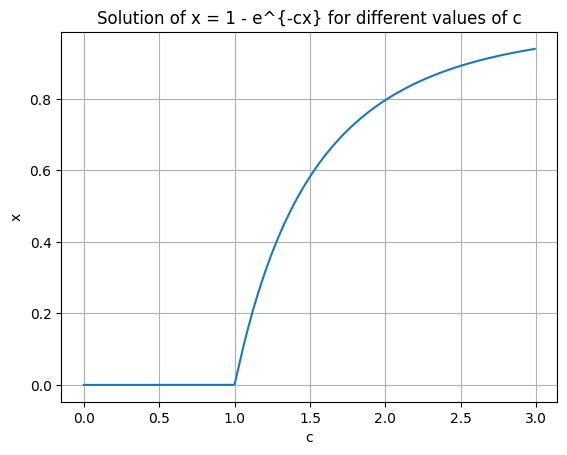

'\nFrom the graph we can observe that there seem to be two regions, \nthe region of 0 < c < 1 where x = 0, and\nthe region of c > 1 where x is some increasing value between 0 and 1.\n\nThis is representative of the actual solution of the equation, which has 2 solutions for every c,\na trivial solution at x=0 and a non-trivial solution noted by the increasing curve.\n\nThis cannot be seen due to the limitations of the relaxation method, which only finds the nearest solution.\nthis could be improved by running the relaxation method with different initial guesses and stitiching the solutions together.\n'

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#defining the relaxation method
def relaxation_method(c, init=1, max_iter=10000):
    x = init                        # Initial guess
    for _ in range(max_iter):       # Loop until a predetermined amount, avoids infintite loops
        x_new = 1 - np.exp(-c * x)  # Compute the new value of x
        if abs(x_new - x) < 1e-6:   # Check for convergence, i.e. the difference between the new and old value is less than 1e-6
            return x_new            # Return the solution
        x = x_new                   # Update the old of x
    raise ValueError("Solution did not converge")

# Solve for c = 2
c = 2
solution = relaxation_method(c)
print(f"Solution for c = {c}: x = {solution:6f}")
# :6f is used to format the output to 6 decimal places

# Solve for values of c from 0 to 3 in steps of 0.01
c_values = np.arange(0, 3.00, 0.01)
x_values = [relaxation_method(c) for c in c_values]

# Plot x as a function of c
plt.plot(c_values, x_values)
plt.xlabel('c')
plt.ylabel('x')
plt.title('Solution of x = 1 - e^{-cx} for different values of c')
plt.grid(True)
plt.show()

'''
From the graph we can observe that there seem to be two regions, 
the region of 0 < c < 1 where x = 0, and
the region of c > 1 where x is some increasing value between 0 and 1.

This is representative of the actual solution of the equation, which has 2 solutions for every c,
a trivial solution at x=0 and a non-trivial solution noted by the increasing curve.

This cannot be seen due to the limitations of the relaxation method, which only finds the nearest solution.
this could be improved by running the relaxation method with different initial guesses and stitiching the solutions together.
'''

### PROBLEM 3

**Physics Application: Calculating the Lagrange point**

_Refer to Exercise 6.16 of the Newman text._ The $L_1$ Lagrange point is the point between the Earth and the Moon at which a satellite will orbit the Earth in perfect synchrony with the Moon, staying always in between the two.

Assuming circular orbits, and assuming that the Earth is much more massive than either the Moon or the satellite, the distance $r$ from the center of the Earth to the $L_1$ point satisfies
$$ \begin{equation}
\frac{GM}{r^2} - \frac{Gm}{(R-r)^2} = \omega^2 r,
\end{equation} $$
where $R$ is the distance from the Earth to the Moon, $M$ and $m$ are the Earth and Moon masses, $G$ is Newton's gravitational constant, and $\omega$ is the angular velocity of both the Moon and the satellite.

Use Newton's method to solve for the distance r from the Earth to the $L_1$ point. Compute a solution accurate to at least four significant figures.

In [2]:
# Constants
G = 6.67430e-11  # Gravitational constant, m^3 kg^-1 s^-2
M = 5.972e24     # Mass of the Earth, kg
m = 7.348e22     # Mass of the Moon, kg
R = 3.844e8      # Distance from the Earth to the Moon, m
omega = 2.662e-6 # Angular velocity, rad/s

# Function to find the root of, LHS-RHS=0
def f(r):
    return (G * M / r**2) - (G * m / (R - r)**2) - (omega**2 * r)

# Derivative of the function f(r)
def df(r):
    return (-2 * G * M / r**3) - (2 * G * m / (R - r)**3) - omega**2

# Newton's method
def newtons_method(r, tol=1e-5, max_iter=1000):
    for _ in range(max_iter):
        r_new = r - f(r) / df(r)
        if abs(r_new - r) < tol:
            return r_new
        r = r_new
    raise ValueError("Solution did not converge")

# Initial guess
r0 = R / 2

# Solve for r
L1 = newtons_method(r0)
print(f"Distance to L1 point: r = {L1} meters")


Distance to L1 point: r = 326030570.2601384 meters
